 Neural network, experimentation tool with adjusting the learning rate (LR) 


Training with Learning Rate: 0.005
Epoch 1, Loss: 0.021714428649323617
Epoch 2, Loss: 0.015723564540540132
Epoch 3, Loss: 0.015071556868906934
Epoch 4, Loss: 0.014966506402876443
Epoch 5, Loss: 0.014893924183798157
Epoch 6, Loss: 0.014811742544379693
Epoch 7, Loss: 0.014720986145563575
Epoch 8, Loss: 0.014623631484738659
Epoch 9, Loss: 0.014520409694832362
Epoch 10, Loss: 0.01441145502800603
Epoch 11, Loss: 0.014296683798329362
Epoch 12, Loss: 0.014175941331161563
Epoch 13, Loss: 0.014049054738916277
Epoch 14, Loss: 0.01391585230136153
Epoch 15, Loss: 0.013776171539169157
Epoch 16, Loss: 0.013629863580072604
Epoch 17, Loss: 0.013476796374909077
Epoch 18, Loss: 0.013316857606492259
Epoch 19, Loss: 0.013149957554669935
Epoch 20, Loss: 0.012976031983384087
Epoch 21, Loss: 0.012795045045799766
Epoch 22, Loss: 0.012606992176402088
Epoch 23, Loss: 0.012411902926051094
Epoch 24, Loss: 0.012209843688057642
Epoch 25, Loss: 0.012000920257494845
Epoch 26, Loss: 0.011785280161413557
Epoch 27, Los

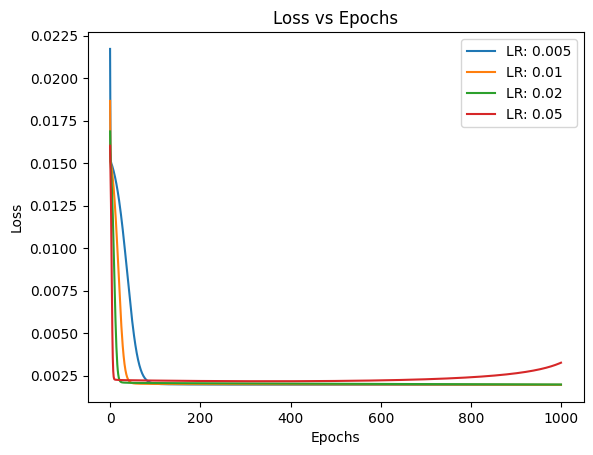

In [2]:
import numpy as np

# Activation functions
def activation_ReLU(number):
    return min(max(number, 0), 1e6)  # Cap the output to avoid overflow

def activation_ReLU_partial_derivative(number):
    return 1 if number > 0 else 0

# Data generator function
def generate_train_data():
    result = []
    for x in range(100):
        n1 = np.random.randint(0, 5)
        n2 = np.random.randint(3, 7)
        n3 = n1 ** 2 + n2 + np.random.randint(0, 5)
        result.append([n1 / 5.0, n2 / 7.0, n3 / 50.0])  # Normalize inputs and outputs
    return result

# Initialize weights and biases
def initialize_parameters():
    return {
        'w1': 0.1, 'w2': 0.1, 'w3': 0.1, 'w4': -0.1, 'w5': 0.1, 'w6': 0.1,
        'bias1': 0.1, 'bias2': 0.0, 'bias3': 0.1
    }

# Training function with adjustable learning rate
def train_network(data, learning_rate, epochs):
    params = initialize_parameters()
    loss_points = []

    for epoch in range(epochs):
        total_loss = 0
        for row in data:
            input1, input2, true_value = row

            # Forward pass
            node_1_output = activation_ReLU(input1 * params['w1'] + input2 * params['w3'] + params['bias1'])
            node_2_output = activation_ReLU(input1 * params['w2'] + input2 * params['w4'] + params['bias2'])
            node_3_output = activation_ReLU(node_1_output * params['w5'] + node_2_output * params['w6'] + params['bias3'])

            # Loss calculation
            loss = (node_3_output - true_value) ** 2
            total_loss += loss

            # Backpropagation
            deriv_L_w5 = 2 * node_1_output * (node_3_output - true_value)
            deriv_L_w6 = 2 * node_2_output * (node_3_output - true_value)
            deriv_L_b3 = 2 * (node_3_output - true_value)
            
            params['w5'] -= learning_rate * deriv_L_w5
            params['w6'] -= learning_rate * deriv_L_w6
            params['bias3'] -= learning_rate * deriv_L_b3

            deriv_L_w1 = (2 * params['w5'] * (node_3_output - true_value) *
                          activation_ReLU_partial_derivative(input1 * params['w1'] + input2 * params['w3'] + params['bias1']) * input1)
            deriv_L_w3 = (2 * params['w5'] * (node_3_output - true_value) *
                          activation_ReLU_partial_derivative(input1 * params['w1'] + input2 * params['w3'] + params['bias1']) * input2)
            deriv_L_b1 = (2 * params['w5'] * (node_3_output - true_value) *
                          activation_ReLU_partial_derivative(input1 * params['w1'] + input2 * params['w3'] + params['bias1']))
            
            params['w1'] -= learning_rate * deriv_L_w1
            params['w3'] -= learning_rate * deriv_L_w3
            params['bias1'] -= learning_rate * deriv_L_b1

        loss_points.append(total_loss / len(data))
        print(f"Epoch {epoch + 1}, Loss: {total_loss / len(data)}")

    return loss_points

# Experiment with different learning rates
learning_rates = [0.005, 0.01, 0.02, 0.05]
epochs = 1000
data = generate_train_data()

for lr in learning_rates:
    print(f"\nTraining with Learning Rate: {lr}")
    loss_points = train_network(data, lr, epochs)

    # Optional: Plot the loss points
    import matplotlib.pyplot as plt
    plt.plot(loss_points, label=f"LR: {lr}")

plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
